In [1]:
import pymongo as pm
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import matplotlib.pyplot as plt

In [2]:
myClient = pm.MongoClient("mongodb://localhost:27017/")

In [3]:
mydb = myClient["covid19_w"]

In [4]:
mycoll = mydb["covid"]

In [5]:
cursor = mycoll.find()
df =  pd.DataFrame(list(cursor))

In [6]:
df.head()

,_id,Probe,infection,timepoint,subject_id,gender,ILMN_1343291,ILMN_1343295,ILMN_1651199,ILMN_1651209,...,ILMN_2415748,ILMN_2415776,ILMN_2415786,ILMN_2415826,ILMN_2415898,ILMN_2415911,ILMN_2415926,ILMN_2415949,ILMN_2415979,ILMN_2416019
0,"ObjectId(""5e91db0f91aa035d88aceec8"")",GSM983403,SIRS,Day_3,23,male,23188.5,3061.6,69.9,76.3,...,401.5,67.1,182.1,106.6,298.5,109.7,83.7,119.4,817.4,74.3
1,"ObjectId(""5e91db1091aa035d88aceec9"")",GSM983404,SIRS,Day_2,23,male,23622.4,2779.9,65.8,79.3,...,268.8,68.1,235.6,73.0,221.1,104.1,98.2,113.6,1240.9,70.4
2,"ObjectId(""5e91db1191aa035d88aceeca"")",GSM983405,SIRS,Day_1,23,male,21332.7,3090.9,74.3,67.2,...,364.9,64.5,226.5,73.4,235.4,107.9,79.1,137.8,961.5,63.2
3,"ObjectId(""5e91db1191aa035d88aceecb"")",GSM983406,bacterial pneumonia,Day_3,1,female,12858.6,3740.9,69.2,76.4,...,530.6,54.4,86.6,70.5,277.0,115.9,73.2,82.3,1345.8,56.4
4,"ObjectId(""5e91db1291aa035d88aceecc"")",GSM983407,bacterial pneumonia,Day_1,33,female,12497.9,4383.5,65.0,80.5,...,542.2,58.1,158.2,89.4,268.6,77.2,77.5,105.7,1368.2,58.5


In [7]:
df.dropna(inplace=True)

In [8]:
df_new = df.drop(['_id','infection','timepoint','gender'],axis=1)

In [9]:
df_new.shape

(28, 48756)

In [10]:
df_new.head()

,Probe,subject_id,ILMN_1343291,ILMN_1343295,ILMN_1651199,ILMN_1651209,ILMN_1651210,ILMN_1651221,ILMN_1651228,ILMN_1651229,...,ILMN_2415748,ILMN_2415776,ILMN_2415786,ILMN_2415826,ILMN_2415898,ILMN_2415911,ILMN_2415926,ILMN_2415949,ILMN_2415979,ILMN_2416019
0,GSM983403,23,23188.5,3061.6,69.9,76.3,74.0,68.3,6411.6,81.0,...,401.5,67.1,182.1,106.6,298.5,109.7,83.7,119.4,817.4,74.3
1,GSM983404,23,23622.4,2779.9,65.8,79.3,72.3,81.5,7167.5,83.4,...,268.8,68.1,235.6,73.0,221.1,104.1,98.2,113.6,1240.9,70.4
2,GSM983405,23,21332.7,3090.9,74.3,67.2,68.2,71.1,7297.7,82.6,...,364.9,64.5,226.5,73.4,235.4,107.9,79.1,137.8,961.5,63.2
3,GSM983406,1,12858.6,3740.9,69.2,76.4,71.1,79.0,2727.5,125.9,...,530.6,54.4,86.6,70.5,277.0,115.9,73.2,82.3,1345.8,56.4
4,GSM983407,33,12497.9,4383.5,65.0,80.5,76.8,78.8,3263.1,79.9,...,542.2,58.1,158.2,89.4,268.6,77.2,77.5,105.7,1368.2,58.5


In [11]:
df.shape

(28, 48760)

In [12]:
def calc_count(df,colname):
    cnt = df[colname].count()
    srs = df[colname].value_counts()
    i=0
    for i in range(len(srs)):
        print("Name: ", srs.index[i])
        print("Count: ", srs[i])
        print("Count%: ", (srs[i]/cnt)*100)

In [13]:
calc_count(df,'infection')

Name:  bacterial pneumonia
Count:  18
Count%:  64.28571428571429
Name:  SIRS
Count:  8
Count%:  28.57142857142857
Name:  influenza A pneumonia
Count:  2
Count%:  7.142857142857142


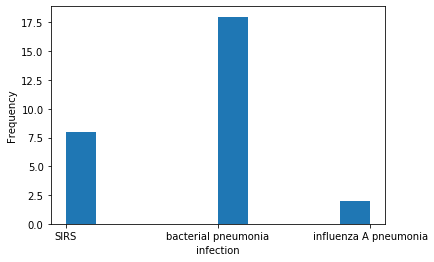

In [14]:
fig, ax = plt.subplots()
ax.hist(df['infection'], cumulative=False)
ax.set_xlabel('infection')
ax.set_ylabel('Frequency')
plt.show()

In [15]:
def calc_stats(df,colname):
    min_val = float(df[colname].min())
    max_val = float(df[colname].max())
    range_val = max_val - min_val
    mean_val = np.mean(df[colname].astype(float))
    mode_val = df[colname].astype(float).mode()
    median_val = np.median(df[colname].astype(float))
    var_val = np.var(df[colname].astype(float))
    std_val = np.std(df[colname].astype(float))
    cov_val = np.cov(df[colname].astype(float))
    print("The Min Value of {0} is {1:.2f}".format(colname,min_val))
    print("The Max Value of {0} is {1:.2f}".format(colname,max_val))
    print("The Range Value of {0} is {1:.2f}".format(colname,range_val))
    print("The Mean Value of {0} is {1:.2f}".format(colname,mean_val))
    print("The Mode Value of {0} is ".format(colname),mode_val)
    print("The Median Value of {0} is {1:.2f}".format(colname,median_val))
    print("The Variance of {0} is {1:.2f}".format(colname,var_val))
    print("The Standard Deviation of {0} is {1:.2f}".format(colname,std_val))
    print("The Covariance of {0} is {1:.2f}".format(colname,cov_val))

In [16]:
calc_stats(df,'ILMN_1651199')

The Min Value of ILMN_1651199 is 58.90
The Max Value of ILMN_1651199 is 79.80
The Range Value of ILMN_1651199 is 20.90
The Mean Value of ILMN_1651199 is 69.39
The Mode Value of ILMN_1651199 is  0    65.8
1    71.5
dtype: float64
The Median Value of ILMN_1651199 is 69.95
The Variance of ILMN_1651199 is 27.73
The Standard Deviation of ILMN_1651199 is 5.27
The Covariance of ILMN_1651199 is 28.76


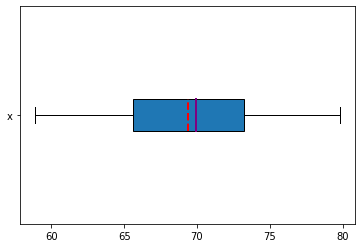

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.boxplot(df['ILMN_1651199'].astype(float), vert=False, showmeans=True, meanline=True,
           labels=('x'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

In [18]:
def calc_chisq(df,col1,col2):
    new_df = pd.crosstab(index=df[col1],columns=df[col2])
    print("Contingency Table: \n", new_df.head())
    #print("\n")
    stat, p, dof, expected = chi2_contingency(new_df)
    print('dof=%d' % dof)
    #print("\n")
    print("Expected Frequencies: ", expected)
    #print("\n")
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    #print("\n")
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

In [19]:
calc_chisq(df,'gender','infection')

Contingency Table: 
 infection  SIRS  bacterial pneumonia  influenza A pneumonia
gender                                                     
female        0                    8                      0
male          8                   10                      2
dof=2
Expected Frequencies:  [[ 2.28571429  5.14285714  0.57142857]
 [ 5.71428571 12.85714286  1.42857143]]
probability=0.950, critical=5.991, stat=6.222
Dependent (reject H0)
significance=0.050, p=0.045
Dependent (reject H0)


In [20]:
x_mean = np.mean(df['ILMN_1343291'].astype(float))
print("x mean= ",x_mean)
y_mean = np.mean(df['ILMN_1343295'].astype(float))
print("y mean= ",y_mean)
sum_xy=0
for x,y in zip(df['ILMN_1343291'].astype(float),df['ILMN_1343295'].astype(float)):
    sum_xy=sum_xy+(x-x_mean)*(y-y_mean)
covar2 = sum_xy/(len(df['ILMN_1343291'])-1)
print(covar2)

x mean=  22627.096428571425
y mean=  4167.15357142857
99564.92167989441


In [21]:
def calc_corr(df,col1,col2):
    col1_var = np.var(df[col1].astype(float))
    print(col1_var)
    col2_var = np.var(df[col2].astype(float))
    print(col2_var)
    covar = np.cov(df[col1].astype(float),y=df[col2].astype(float))
    print(covar)
    lin_corr = covar/np.sqrt(col1_var*col2_var)
    print("Linear Correlation: ",lin_corr)

In [22]:
calc_corr(df,'ILMN_1343291','ILMN_1343295')

28421893.044630103
1258936.0410586733
[[29474555.74998678    99564.92167989]
 [   99564.92167989  1305563.30183862]]
Linear Correlation:  [[4.92741265 0.01664478]
 [0.01664478 0.21825771]]


In [23]:
np.corrcoef(df['ILMN_1343291'].astype(float),df['ILMN_1343295'].astype(float))

array([[1.        , 0.01605032],
       [0.01605032, 1.        ]])

In [24]:
pearsonr(df['ILMN_1343291'].astype(float), df['ILMN_1343295'].astype(float))

(0.01605032221700696, 0.93539171087788)

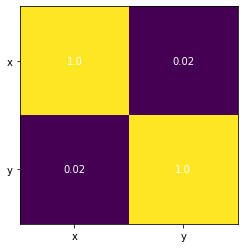

In [25]:
matrix = np.corrcoef(df['ILMN_1343291'].astype(float),df['ILMN_1343295'].astype(float)).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

In [26]:
def calc_zval(df,collist):
    for col in collist:
        col_zscore = col + '_zscore'
        col_zscore = (df[col].astype(float) - df[col].astype(float).mean())/df[col].astype(float).std(ddof=0)
        print(col + '_zscore',col_zscore)

In [27]:
col_list = ['ILMN_1343291','ILMN_1343295']
#calc_zval(df,col_list)

## K-Means clusteing and KNN

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
df_scaled = df_new.drop(['Probe'],axis=1)

In [45]:
df_target = df_new['Probe']

In [33]:
cols_vals = df_scaled.columns.values
cols_vals

array(['subject_id', 'ILMN_1343291', 'ILMN_1343295', ..., 'ILMN_2415949',
       'ILMN_2415979', 'ILMN_2416019'], dtype=object)

## Applying MinMax scaling

In [34]:
df_scaled = scaler.fit_transform(df_scaled)

In [35]:
df_sc = pd.DataFrame(df_scaled,columns=cols_vals)

In [36]:
df_sc.head()

,subject_id,ILMN_1343291,ILMN_1343295,ILMN_1651199,ILMN_1651209,ILMN_1651210,ILMN_1651221,ILMN_1651228,ILMN_1651229,ILMN_1651230,...,ILMN_2415748,ILMN_2415776,ILMN_2415786,ILMN_2415826,ILMN_2415898,ILMN_2415911,ILMN_2415926,ILMN_2415949,ILMN_2415979,ILMN_2416019
0,0.6875,0.596414,0.054182,0.526316,0.261494,0.530120,0.210345,0.873108,0.142857,0.535316,...,0.221573,0.557018,0.201817,0.809701,0.647924,0.734205,0.137615,0.571649,0.154956,0.665428
1,0.6875,0.620621,0.000000,0.330144,0.347701,0.461847,0.665517,0.981355,0.170507,0.446097,...,0.000000,0.600877,0.314877,0.182836,0.394900,0.612200,0.327654,0.482280,0.275676,0.520446
2,0.6875,0.492881,0.059818,0.736842,0.000000,0.297189,0.306897,1.000000,0.161290,0.691450,...,0.160461,0.442982,0.295647,0.190299,0.441648,0.694989,0.077326,0.855162,0.196032,0.252788
3,0.0000,0.020123,0.184840,0.492823,0.264368,0.413655,0.579310,0.345534,0.660138,0.498141,...,0.437135,0.000000,0.000000,0.136194,0.577640,0.869281,0.000000,0.000000,0.305579,0.000000
4,1.0000,0.000000,0.308438,0.291866,0.382184,0.642570,0.572414,0.422234,0.130184,0.107807,...,0.456504,0.162281,0.151310,0.488806,0.550180,0.026144,0.056356,0.360555,0.311964,0.078067


## Applying Anova for Feature Selection

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [38]:
sel_anova = SelectKBest(f_classif, k=10)    # select 10 features
df_anova = sel_anova.fit_transform(X=df_sc,y=df_target)
print(df_anova.shape[1])

10


C:\Users\nandi\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


In [40]:
arr_cols = sel_anova.get_support()

In [341]:
#np.where(arr_cols)[0]

In [43]:
list_sig_cols = cols_vals[np.where(arr_cols)[0]]

In [340]:
list_sig_cols

array(['ILMN_2415748', 'ILMN_2415776', 'ILMN_2415786', 'ILMN_2415826',
       'ILMN_2415898', 'ILMN_2415911', 'ILMN_2415926', 'ILMN_2415949',
       'ILMN_2415979', 'ILMN_2416019'], dtype=object)

In [134]:
df_significant = df_sc[list_sig_cols]
df_significant.head()

,ILMN_2415748,ILMN_2415776,ILMN_2415786,ILMN_2415826,ILMN_2415898,ILMN_2415911,ILMN_2415926,ILMN_2415949,ILMN_2415979,ILMN_2416019
0,0.221573,0.557018,0.201817,0.809701,0.647924,0.734205,0.137615,0.571649,0.154956,0.665428
1,0.000000,0.600877,0.314877,0.182836,0.394900,0.612200,0.327654,0.482280,0.275676,0.520446
2,0.160461,0.442982,0.295647,0.190299,0.441648,0.694989,0.077326,0.855162,0.196032,0.252788
3,0.437135,0.000000,0.000000,0.136194,0.577640,0.869281,0.000000,0.000000,0.305579,0.000000
4,0.456504,0.162281,0.151310,0.488806,0.550180,0.026144,0.056356,0.360555,0.311964,0.078067


In [342]:
dftarget = df_target.to_frame('Probe')
#dftarget.head()

## Our resultant dataframe

In [136]:
df_significant = pd.concat([df_target,df_significant],axis=1)

In [137]:
df_significant.head()

,Probe,ILMN_2415748,ILMN_2415776,ILMN_2415786,ILMN_2415826,ILMN_2415898,ILMN_2415911,ILMN_2415926,ILMN_2415949,ILMN_2415979,ILMN_2416019
0,GSM983403,0.221573,0.557018,0.201817,0.809701,0.647924,0.734205,0.137615,0.571649,0.154956,0.665428
1,GSM983404,0.000000,0.600877,0.314877,0.182836,0.394900,0.612200,0.327654,0.482280,0.275676,0.520446
2,GSM983405,0.160461,0.442982,0.295647,0.190299,0.441648,0.694989,0.077326,0.855162,0.196032,0.252788
3,GSM983406,0.437135,0.000000,0.000000,0.136194,0.577640,0.869281,0.000000,0.000000,0.305579,0.000000
4,GSM983407,0.456504,0.162281,0.151310,0.488806,0.550180,0.026144,0.056356,0.360555,0.311964,0.078067


In [304]:

df_significant.to_csv('csv_genome.csv' , index = False)

In [138]:
from scipy.spatial import distance


## Take 2 random data as cluster centers

In [139]:
df_clusters = df_significant.sample(n=2)

In [140]:
df_significant.head()

,Probe,ILMN_2415748,ILMN_2415776,ILMN_2415786,ILMN_2415826,ILMN_2415898,ILMN_2415911,ILMN_2415926,ILMN_2415949,ILMN_2415979,ILMN_2416019
0,GSM983403,0.221573,0.557018,0.201817,0.809701,0.647924,0.734205,0.137615,0.571649,0.154956,0.665428
1,GSM983404,0.000000,0.600877,0.314877,0.182836,0.394900,0.612200,0.327654,0.482280,0.275676,0.520446
2,GSM983405,0.160461,0.442982,0.295647,0.190299,0.441648,0.694989,0.077326,0.855162,0.196032,0.252788
3,GSM983406,0.437135,0.000000,0.000000,0.136194,0.577640,0.869281,0.000000,0.000000,0.305579,0.000000
4,GSM983407,0.456504,0.162281,0.151310,0.488806,0.550180,0.026144,0.056356,0.360555,0.311964,0.078067


In [141]:
df_clusters.head()

,Probe,ILMN_2415748,ILMN_2415776,ILMN_2415786,ILMN_2415826,ILMN_2415898,ILMN_2415911,ILMN_2415926,ILMN_2415949,ILMN_2415979,ILMN_2416019
26,GSM983429,0.662381,0.894737,0.417371,0.251866,0.455378,0.193900,0.256881,0.272727,0.245575,0.405204
4,GSM983407,0.456504,0.162281,0.151310,0.488806,0.550180,0.026144,0.056356,0.360555,0.311964,0.078067


## Remove the cluster centers from the data

In [255]:
df = df_significant[~df_significant.isin(df_clusters)].dropna()
df.shape

(26, 11)

In [256]:
def k_means(df,k):
    ary = distance.cdist(df.iloc[:,1:], df_clusters.iloc[:,1:], metric='euclidean')
    j=0
    for i, row in df.iterrows():
        arr = ary[j]
        df.loc[i,'cluster_id'] = int(np.argmin(arr))
        j=j+1
    return(df.groupby(['cluster_id']).mean())

In [257]:
df_centroids = k_means(df,2)

In [258]:
df_centroids.head()

,ILMN_2415748,ILMN_2415776,ILMN_2415786,ILMN_2415826,ILMN_2415898,ILMN_2415911,ILMN_2415926,ILMN_2415949,ILMN_2415979,ILMN_2416019
cluster_id,,,,,,,,,,
0.0,0.433697,0.651961,0.340038,0.296861,0.445205,0.512880,0.404903,0.518445,0.261397,0.424229
1.0,0.392794,0.215887,0.310933,0.396559,0.430751,0.459695,0.256881,0.495806,0.224392,0.272202


## Method to implement KNN algorithm

In [336]:
def usp_knn(df1):
    cols_list =  df1.drop(['Probe'],axis=1).columns.values
    probes_list = df1['Probe']
    for i, row in df1.iterrows():
        arr_knn = np.linalg.norm(df1[cols_list].sub(np.array(df1[cols_list].iloc[i])), axis=1)
        x1 = np.partition(arr_knn, 1)[0:2]
        lowest = np.nonzero(x1)[0][0]
        idx_lowest = np.where(arr_knn == x1[lowest])
        df1.loc[i,'NN'] = probes_list[idx_lowest[0][0]]

In [337]:
usp_knn(df_significant)

In [339]:
df_significant.head(28)

,Probe,ILMN_2415748,ILMN_2415776,ILMN_2415786,ILMN_2415826,ILMN_2415898,ILMN_2415911,ILMN_2415926,ILMN_2415949,ILMN_2415979,ILMN_2416019,NN
0,GSM983403,0.221573,0.557018,0.201817,0.809701,0.647924,0.734205,0.137615,0.571649,0.154956,0.665428,GSM983420
1,GSM983404,0.000000,0.600877,0.314877,0.182836,0.394900,0.612200,0.327654,0.482280,0.275676,0.520446,GSM983405
2,GSM983405,0.160461,0.442982,0.295647,0.190299,0.441648,0.694989,0.077326,0.855162,0.196032,0.252788,GSM983404
3,GSM983406,0.437135,0.000000,0.000000,0.136194,0.577640,0.869281,0.000000,0.000000,0.305579,0.000000,GSM983422
4,GSM983407,0.456504,0.162281,0.151310,0.488806,0.550180,0.026144,0.056356,0.360555,0.311964,0.078067,GSM983409
5,GSM983408,0.512773,0.921053,0.331150,0.490672,0.452109,0.374728,0.366972,0.232666,0.237108,0.208178,GSM983429
6,GSM983409,0.746368,0.030702,0.212595,0.388060,0.322328,0.167756,0.167759,0.440678,0.685414,0.315985,GSM983407
7,GSM983410,0.112874,0.596491,0.351648,1.000000,0.256293,0.309368,0.490170,0.975347,0.000000,0.353160,GSM983413
8,GSM983411,0.218901,0.399123,0.232671,0.156716,0.140242,1.000000,0.617300,0.425270,0.064992,0.568773,GSM983414
9,GSM983412,0.311905,0.407895,0.476754,0.444030,0.071919,0.300654,1.000000,1.000000,0.098543,1.000000,GSM983413
